# Native Language Identification. BERT baseline
Pauline Claes

In [ ]:
#!pip install simpletransformers==0.60.9

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/NLP_SharedTask"

/content/drive/MyDrive/NLP_SharedTask


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

from simpletransformers.classification import ClassificationModel, ClassificationArgs

import matplotlib.pyplot as plt
import seaborn as sn 

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df = df.drop(columns=['Filename', 'Proficiency'])


In [ ]:
df.rename(columns={'Language': 'labels'}, inplace=True)

In [ ]:
train, dev = train_test_split(df, 
                              test_size = 0.1,
                              random_state=1,
                              shuffle=True,
                              stratify = df.labels)

In [ ]:
train, test = train_test_split(train, 
                               test_size=0.1, 
                               random_state=1, 
                               shuffle=True, 
                               stratify=train.labels)

In [ ]:
# explore train set
print('-'*10, "TRAIN", '-'*10)
print("Number of essays (train):", len(train))
print("train:", train[['labels']].value_counts(sort=False))

print('-'*10, "DEV", '-'*10)
print("Number of essays (dev):", len(dev))
print("dev:", dev[['labels']].value_counts(sort=False))

print('-'*10, "TEST", '-'*10)
print("Number of essays (test):", len(test))
print("test:", test[['labels']].value_counts(sort=False))

---------- TRAIN ----------
Number of essays (train): 8910
train: labels
ARA       810
DEU       810
FRA       810
HIN       810
ITA       810
JPN       810
KOR       810
SPA       810
TEL       810
TUR       810
ZHO       810
dtype: int64
---------- DEV ----------
Number of essays (dev): 1100
dev: labels
ARA       100
DEU       100
FRA       100
HIN       100
ITA       100
JPN       100
KOR       100
SPA       100
TEL       100
TUR       100
ZHO       100
dtype: int64
---------- TEST ----------
Number of essays (test): 990
test: labels
ARA       90
DEU       90
FRA       90
HIN       90
ITA       90
JPN       90
KOR       90
SPA       90
TEL       90
TUR       90
ZHO       90
dtype: int64


In [ ]:
labels_list = list(np.unique(train.labels))
labels_list

['ARA', 'DEU', 'FRA', 'HIN', 'ITA', 'JPN', 'KOR', 'SPA', 'TEL', 'TUR', 'ZHO']

In [ ]:
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True
model_args.labels_list=labels_list
model_args.evaluate_during_training=True

model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5 
model_args.max_seq_length=128

model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience=2 
model_args.evaluate_during_training_steps=34

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False

In [ ]:
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 140 steps.


In [ ]:
bert_model = ClassificationModel('bert', 'bert-base-cased', num_labels=11, args=model_args, use_cuda=True) 

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
_, bert_history = bert_model.train_model(train, eval_df=dev)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/140 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/140 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/140 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/140 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/140 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/140 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/138 [00:00<?, ?it/s]

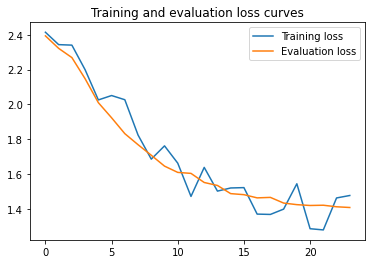

In [ ]:
train_loss = bert_history['train_loss']
eval_loss = bert_history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
predicted, probabilities = bert_model.predict(test['text'].to_list())
test['predicted'] = predicted

  0%|          | 0/124 [00:00<?, ?it/s]

In [ ]:
print(classification_report(test['labels'], test['predicted']))

              precision    recall  f1-score   support

         ARA       0.57      0.58      0.57        90
         DEU       0.50      0.63      0.56        90
         FRA       0.40      0.38      0.39        90
         HIN       0.52      0.51      0.51        90
         ITA       0.44      0.49      0.46        90
         JPN       0.50      0.63      0.56        90
         KOR       0.51      0.49      0.50        90
         SPA       0.37      0.29      0.32        90
         TEL       0.63      0.54      0.58        90
         TUR       0.47      0.40      0.43        90
         ZHO       0.37      0.36      0.36        90

    accuracy                           0.48       990
   macro avg       0.48      0.48      0.48       990
weighted avg       0.48      0.48      0.48       990



In [ ]:
print(accuracy_score(test['labels'], test['predicted']))

0.4818181818181818


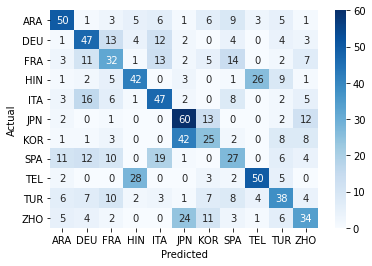

In [ ]:
confusion_matrix = pd.crosstab(test['labels'], test['predicted'], rownames=['Actual'], colnames=['Predicted']) 
sn.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()